<a href="https://colab.research.google.com/github/Kushank2003/ecommerce_sales_analysis/blob/main/ecommerce_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Initial Data Sample ---
   OrderID   Product     Category  Price  Quantity   SaleDate       City  \
0        1    Laptop  Electronics   1200         1 2023-01-01     Mumbai   
1        2     Mouse  Electronics     25         2 2023-01-01      Delhi   
2        3  Keyboard  Electronics     75         1 2023-01-02  Bangalore   
3        4   Monitor  Electronics    300         1 2023-01-02     Mumbai   
4        5    Webcam  Electronics     50         3 2023-01-03    Chennai   

  PaymentMethod  
0   Credit Card  
1    Debit Card  
2   Net Banking  
3   Credit Card  
4           UPI  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        15 non-null     int64         
 1   Product        15 non-null     object        
 2   Category       15 non-null     object        
 3   Price          15 non-null

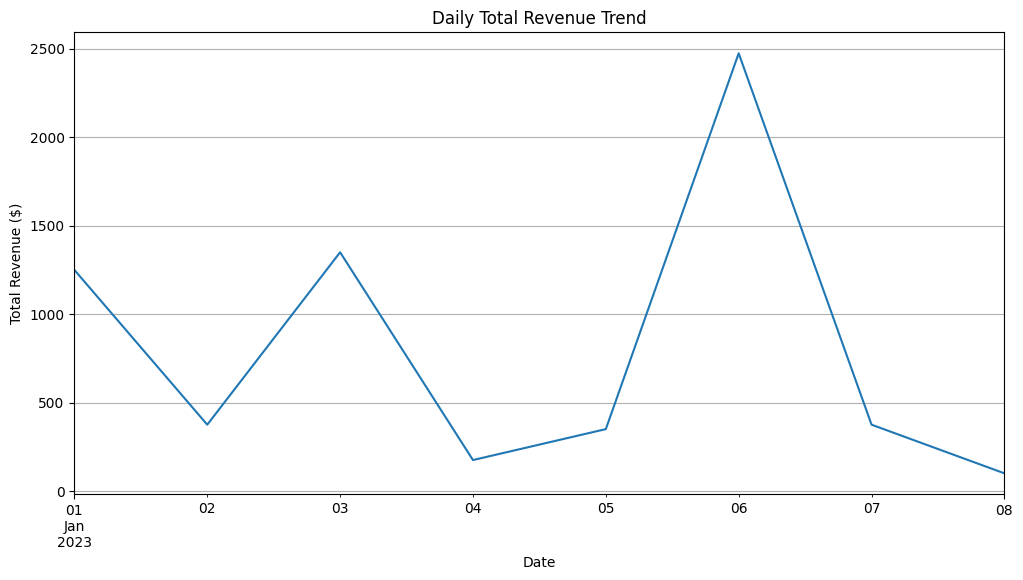

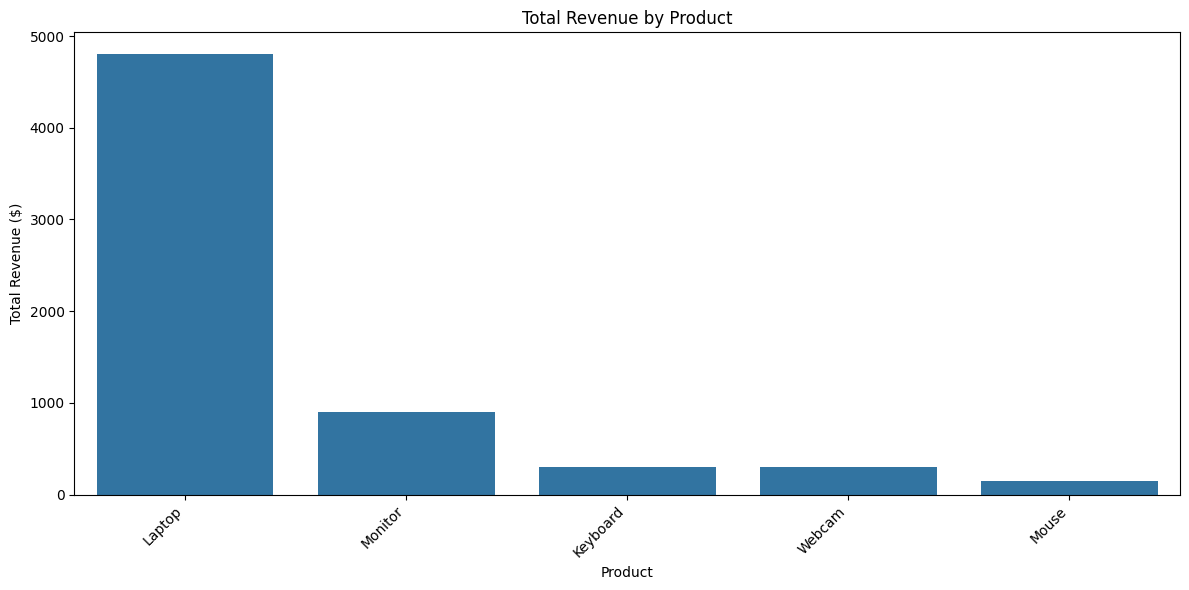

<ipython-input-3-7203b6135335>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='viridis')


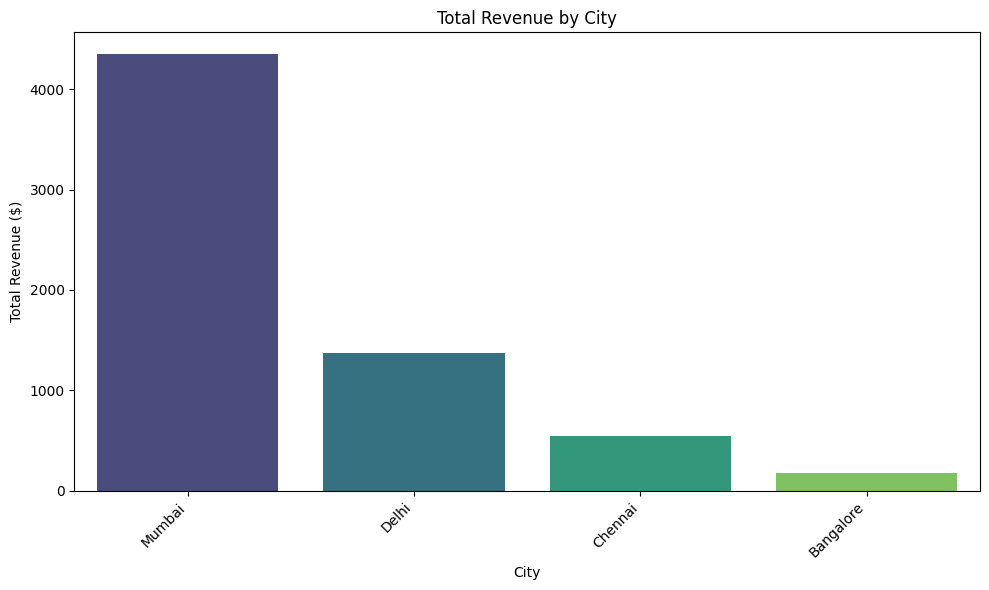

<ipython-input-3-7203b6135335>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values, palette='plasma')


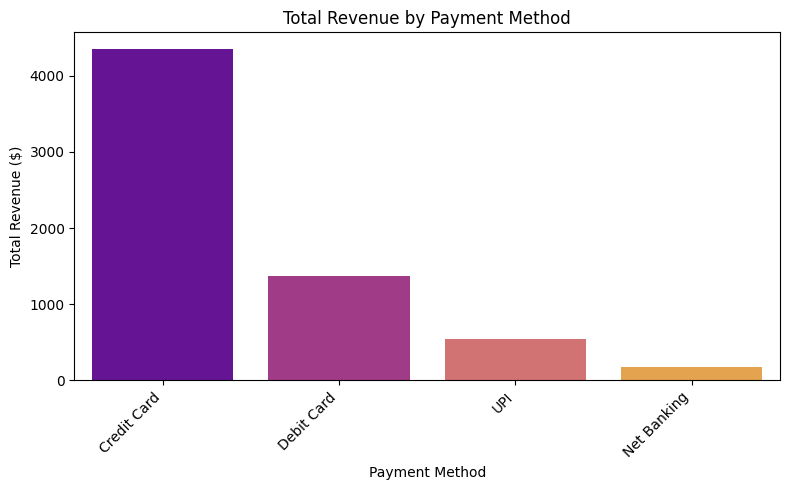


--- Analysis Complete ---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Create Sample Data ---
# In a real scenario, you would load this from a CSV:
# df = pd.read_csv('your_sales_data.csv')

data = {
    'OrderID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam', 'Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam', 'Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics'],
    'Price': [1200, 25, 75, 300, 50, 1200, 25, 75, 300, 50, 1200, 25, 75, 300, 50],
    'Quantity': [1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 2, 3, 1, 1, 2],
    'SaleDate': pd.to_datetime(['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03', '2023-01-04', '2023-01-04', '2023-01-05', '2023-01-05', '2023-01-06', '2023-01-06', '2023-01-07', '2023-01-07', '2023-01-08']),
    'City': ['Mumbai', 'Delhi', 'Bangalore', 'Mumbai', 'Chennai', 'Delhi', 'Bangalore', 'Mumbai', 'Chennai', 'Delhi', 'Mumbai', 'Delhi', 'Bangalore', 'Mumbai', 'Chennai'],
    'PaymentMethod': ['Credit Card', 'Debit Card', 'Net Banking', 'Credit Card', 'UPI', 'Debit Card', 'Net Banking', 'Credit Card', 'UPI', 'Debit Card', 'Credit Card', 'Debit Card', 'Net Banking', 'Credit Card', 'UPI']
}

df = pd.DataFrame(data)

print("--- Initial Data Sample ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

# --- 2. Data Cleaning and Preparation ---

# Check for missing values (in this sample, there are none)
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Ensure SaleDate is datetime (already done during DataFrame creation)
# Ensure Price and Quantity are numeric (already done)

# Calculate Total Price for each row/sale
df['TotalPrice'] = df['Price'] * df['Quantity']

print("\n--- Data with TotalPrice ---")
print(df.head())

# Extract Month and Day of Week for time analysis
df['SaleMonth'] = df['SaleDate'].dt.to_period('M')
df['SaleDayOfWeek'] = df['SaleDate'].dt.day_name()

# --- 3. Exploratory Data Analysis (EDA) ---

print("\n--- EDA: Basic Statistics ---")
print(df[['Price', 'Quantity', 'TotalPrice']].describe())

# Total Revenue
total_revenue = df['TotalPrice'].sum()
print(f"\nTotal Revenue: ${total_revenue:,.2f}")

# Top Selling Products (by Quantity)
top_products_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("\n--- Top Selling Products (by Quantity) ---")
print(top_products_quantity)

# Top Selling Products (by Revenue)
top_products_revenue = df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)
print("\n--- Top Selling Products (by Revenue) ---")
print(top_products_revenue)


# Sales by City
sales_by_city = df.groupby('City')['TotalPrice'].sum().sort_values(ascending=False)
print("\n--- Sales by City ---")
print(sales_by_city)

# Sales by Payment Method
sales_by_payment = df.groupby('PaymentMethod')['TotalPrice'].sum().sort_values(ascending=False)
print("\n--- Sales by Payment Method ---")
print(sales_by_payment)

# --- 4. Data Visualization ---

print("\n--- Generating Visualizations ---")

# Plot Total Revenue Trend over Time (Daily)
sales_over_time = df.groupby('SaleDate')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line')
plt.title('Daily Total Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()

# Plot Sales by Product (Revenue)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values)
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Sales by City
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='viridis')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Sales by Payment Method
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values, palette='plasma')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("\n--- Analysis Complete ---")